In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
#Displaying all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('customer_retention_dataset.xlsx')

In [4]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

### No. of Rows and No. of columns

In [5]:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  269
No. of columns =  71


### Information about data types of each column

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

### Rows having all missing values

In [7]:
# Row indexes of empty rows
print("Row indexes of empty rows : ", df[df.isnull().all(axis =1)].index.tolist())

Row indexes of empty rows :  []


In [8]:
#Checking the missing values in data set
df.isnull().values.any()

False

In [9]:
#Checking the shape of the dataset
df.shape

(269, 71)

In [9]:
#Checking the datatype of the columns
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

Finding:
    1. No null value in any rows.
    2. All features are Object type exept Pin-Code feature check feature type when one by one Univariate analysis of the Features.
    

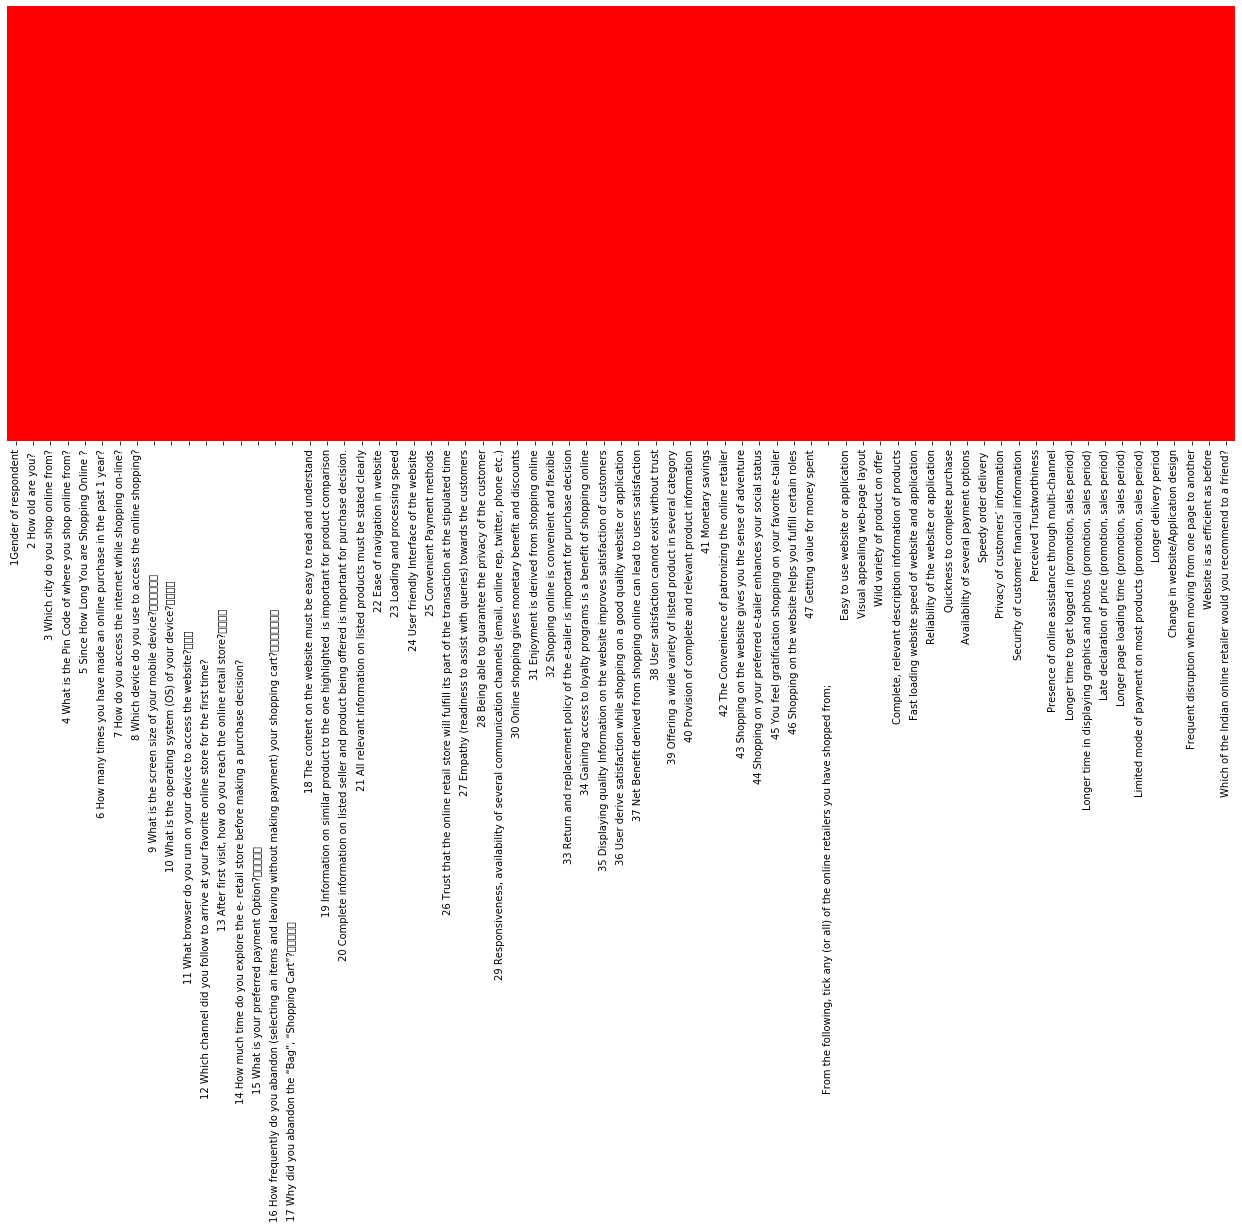

In [11]:
#Seeing the missing values via visualization
plt.figure(figsize=(22,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='autumn')
plt.show()

In [12]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


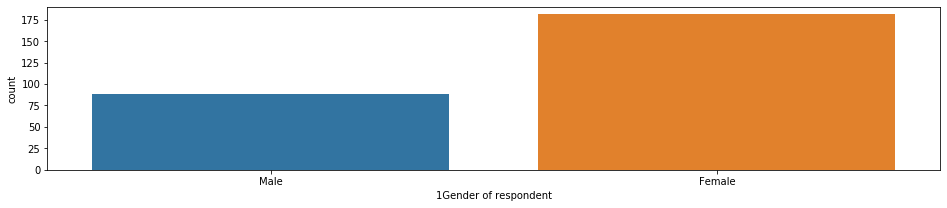

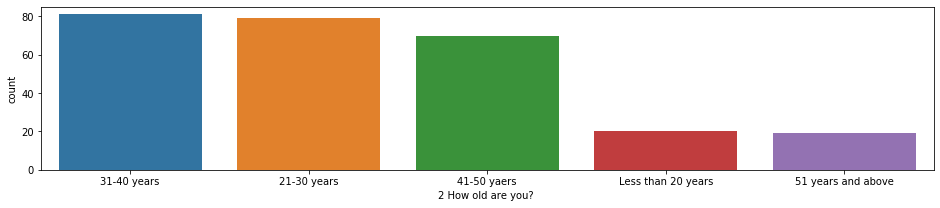

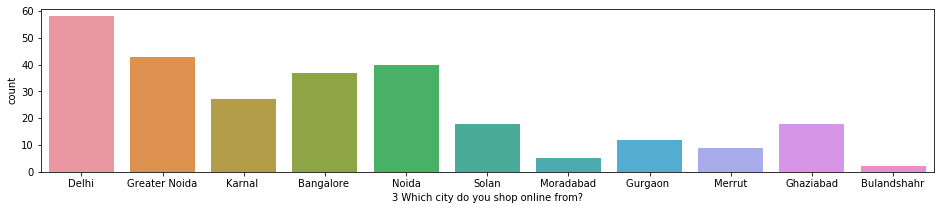

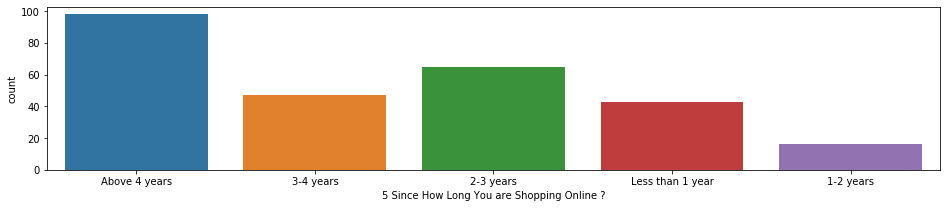

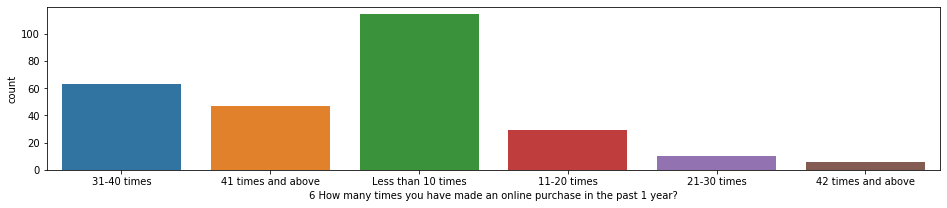

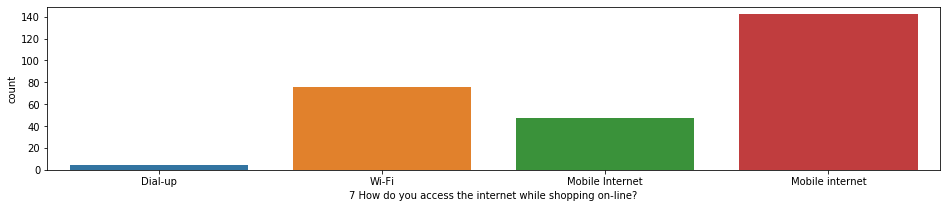

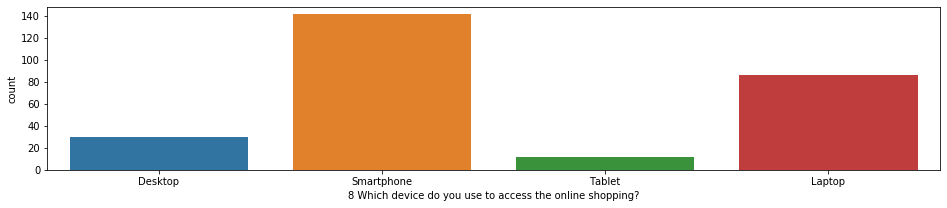

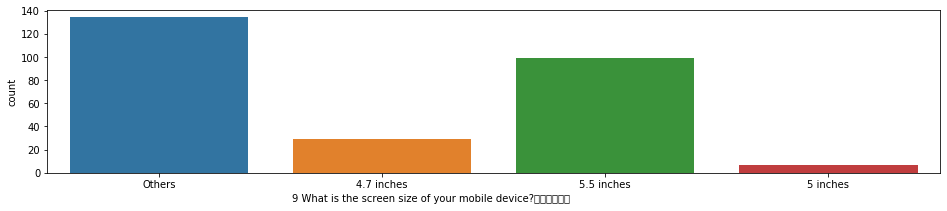

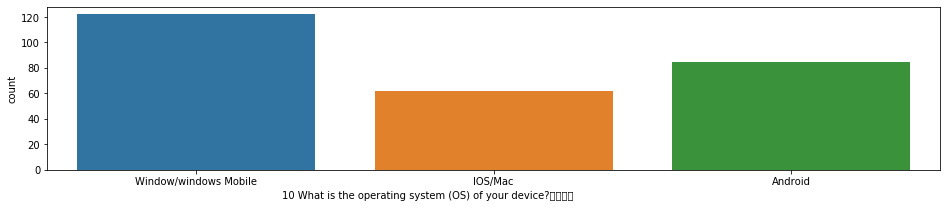

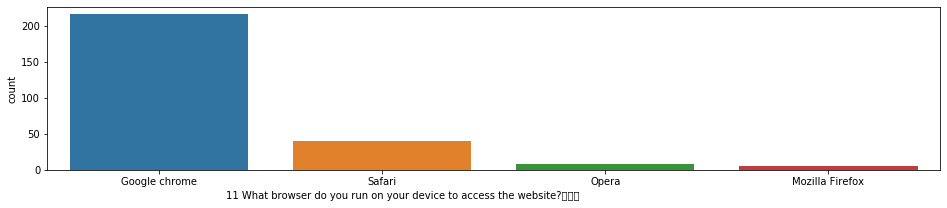

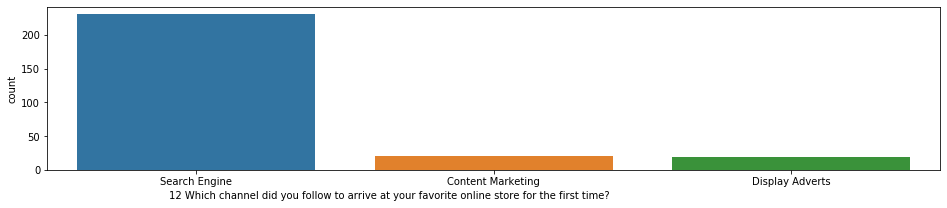

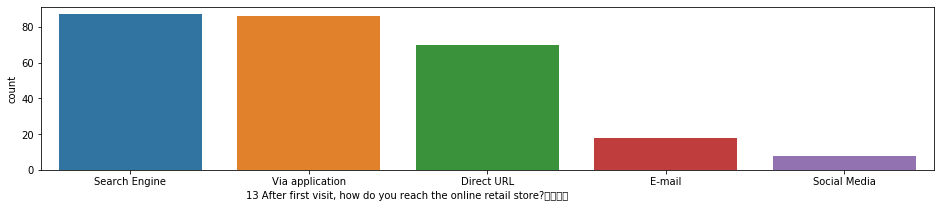

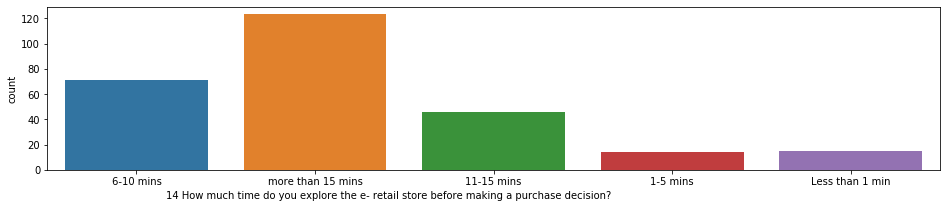

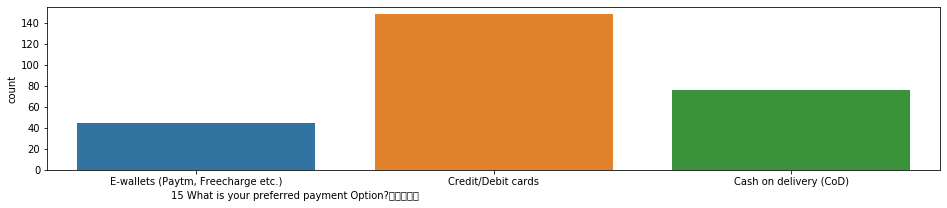

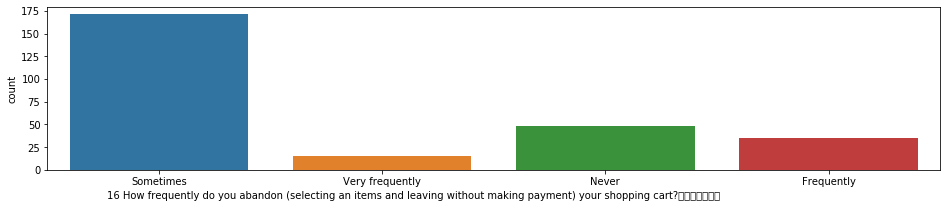

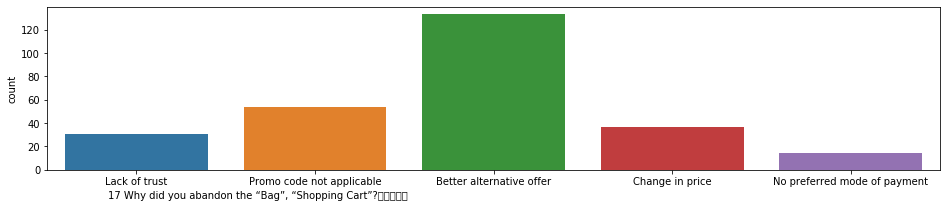

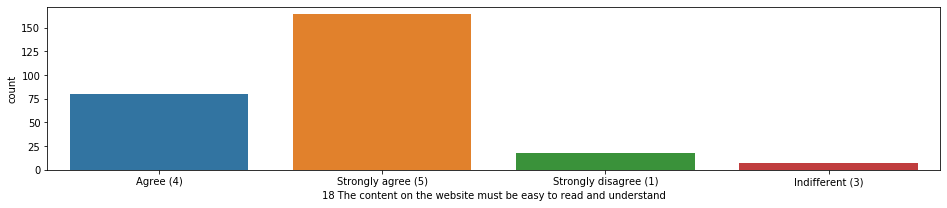

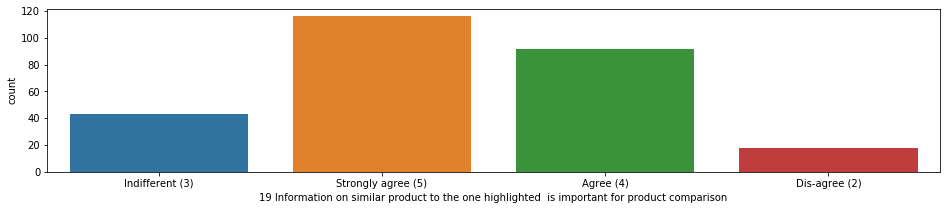

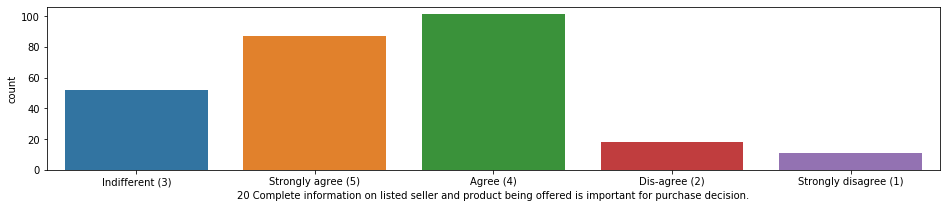

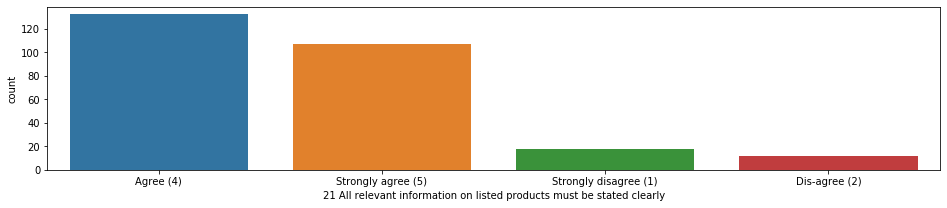

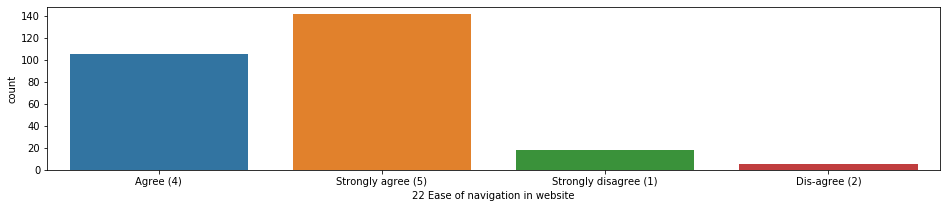

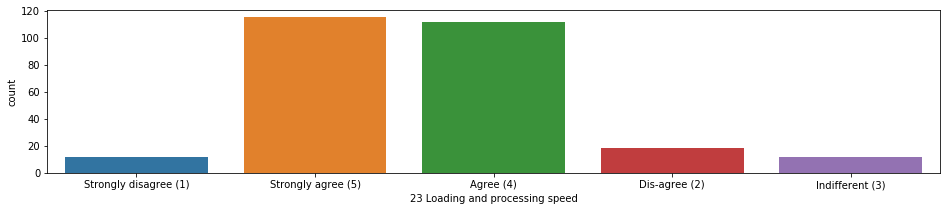

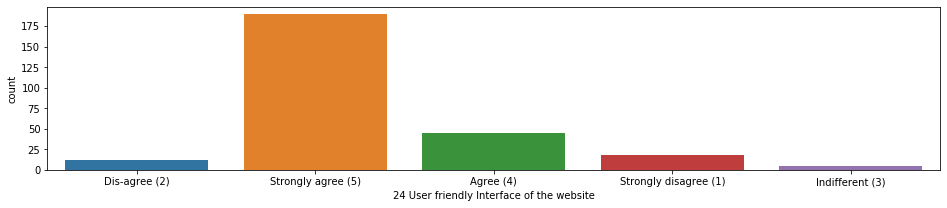

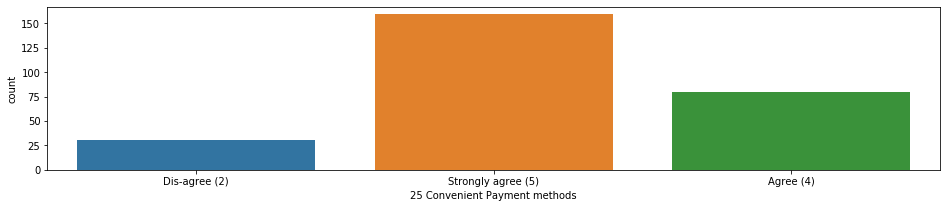

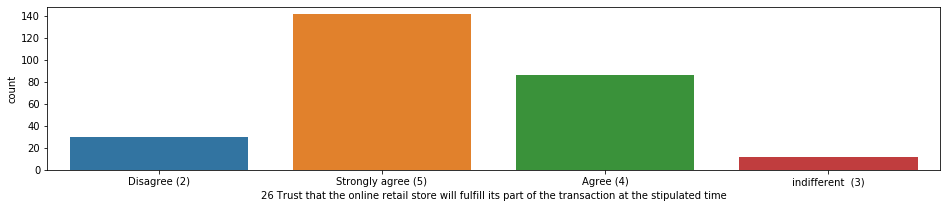

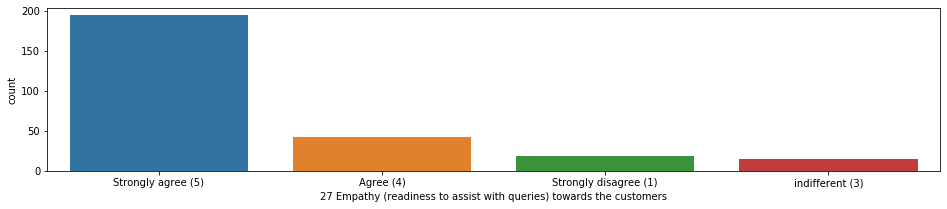

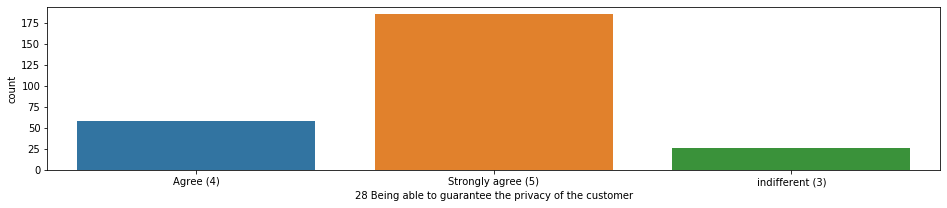

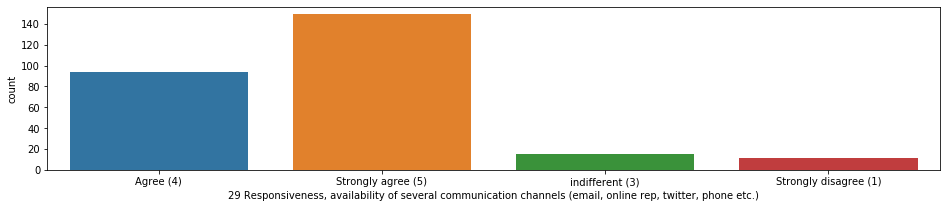

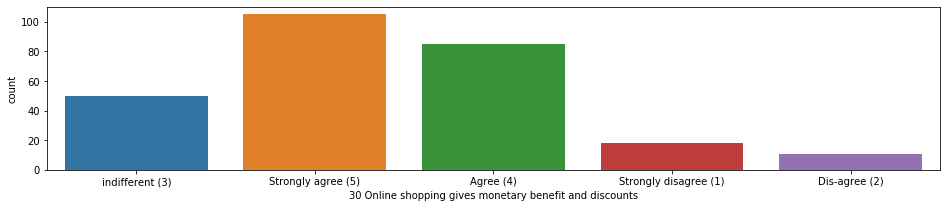

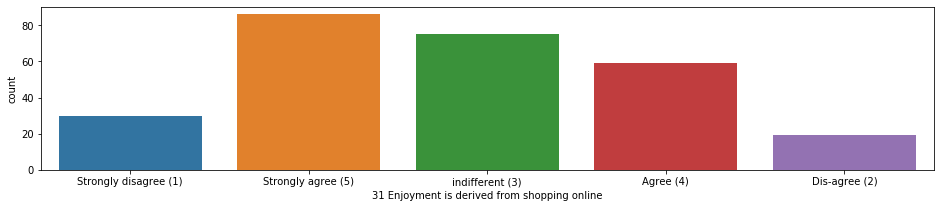

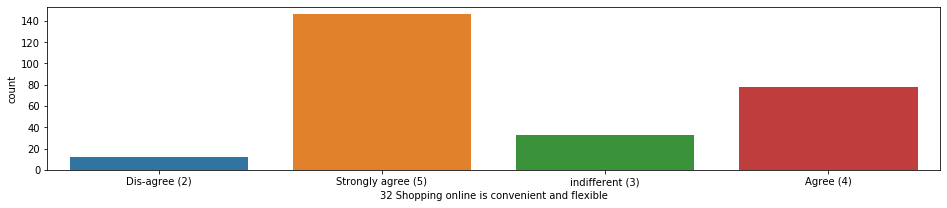

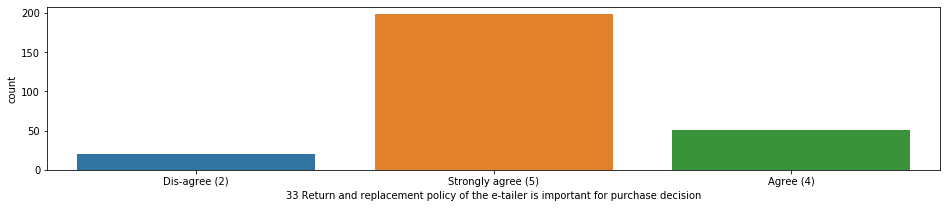

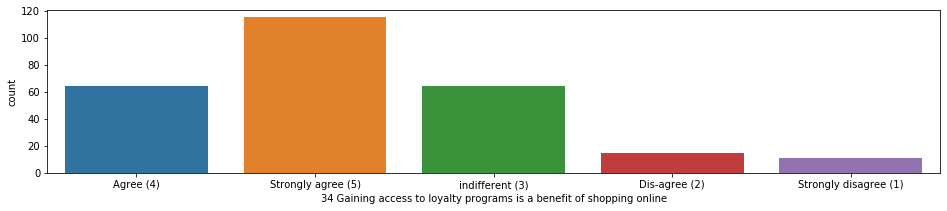

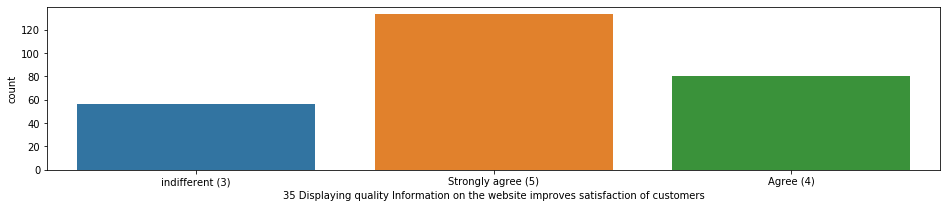

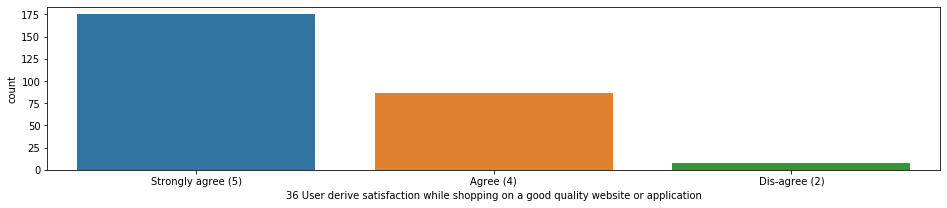

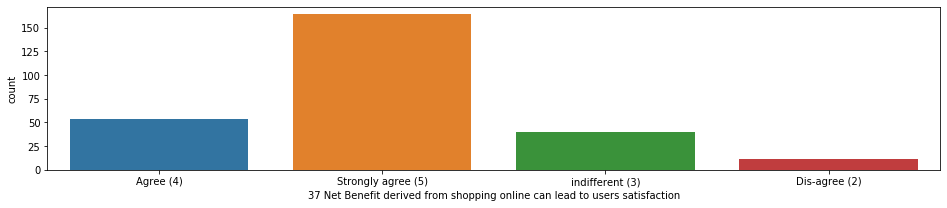

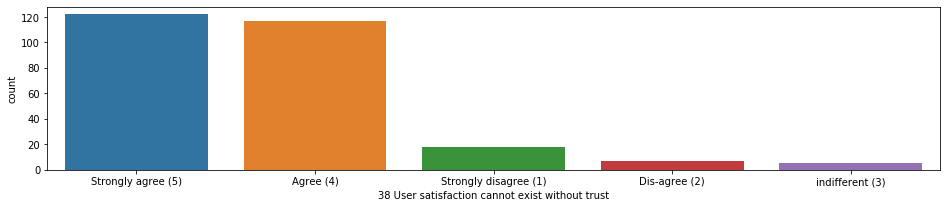

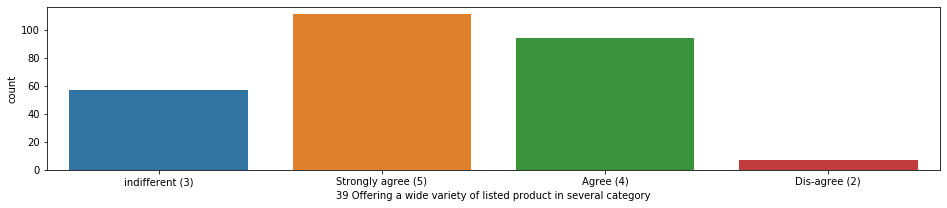

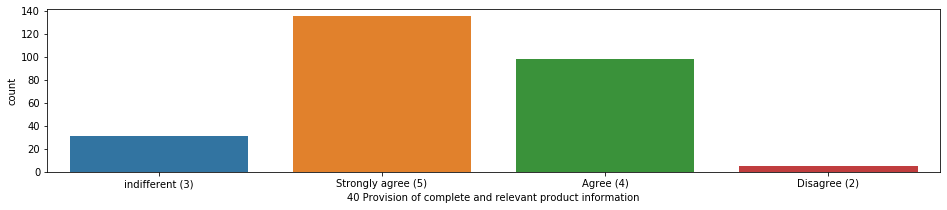

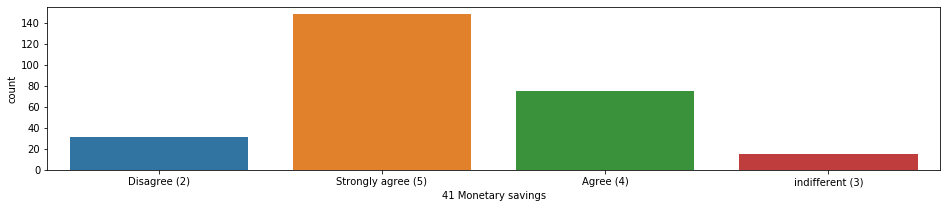

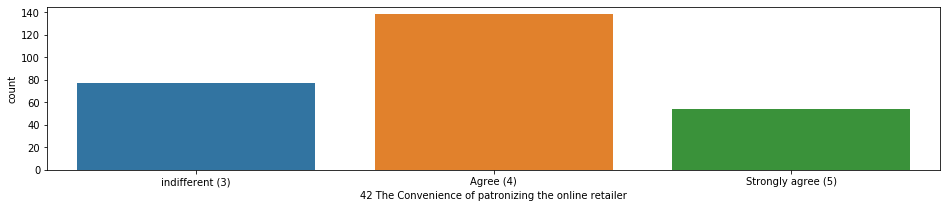

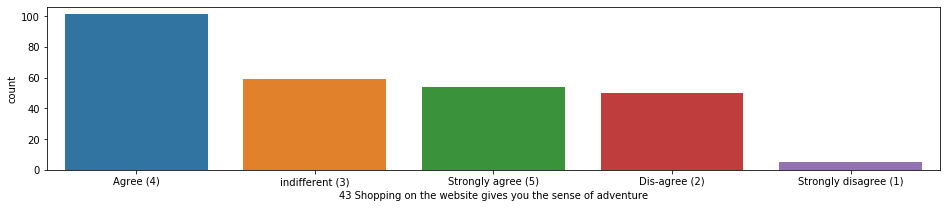

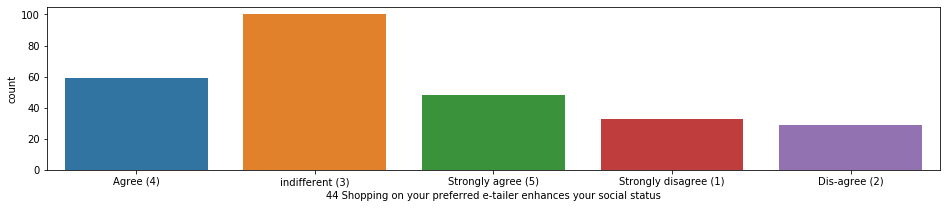

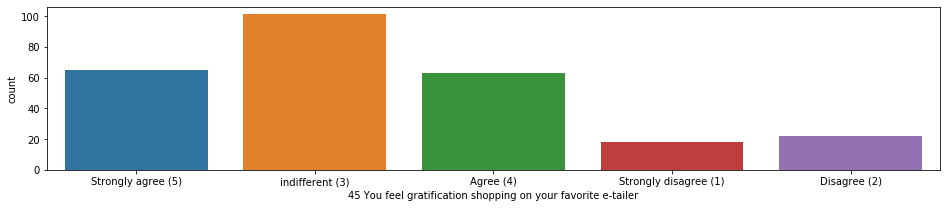

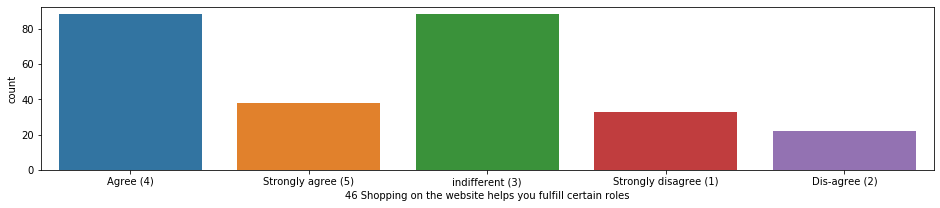

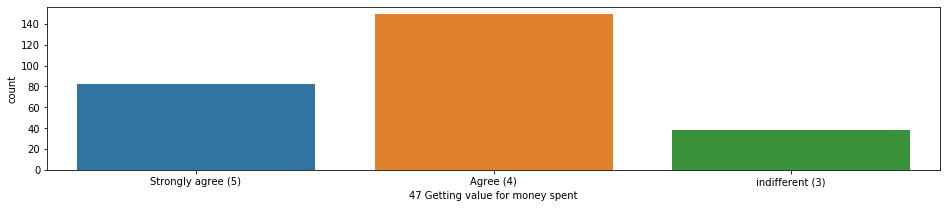

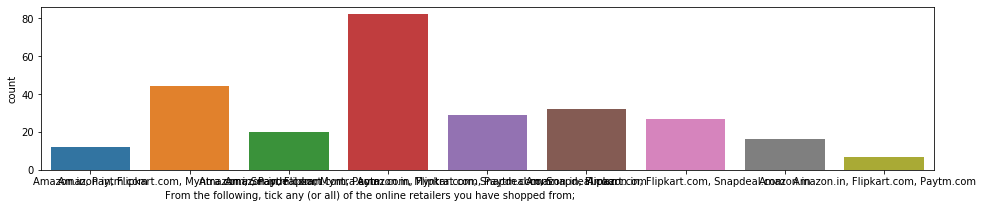

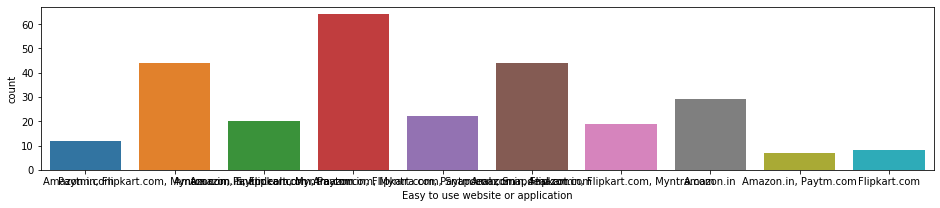

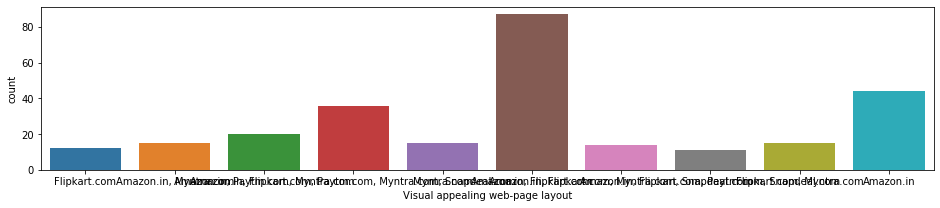

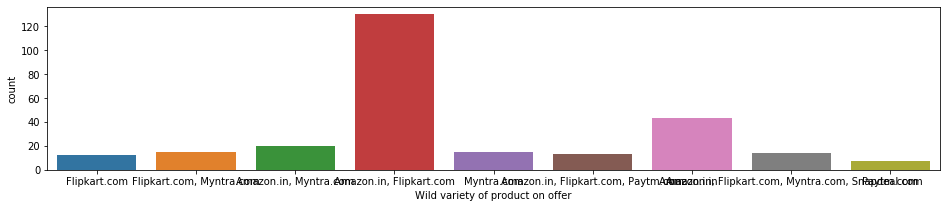

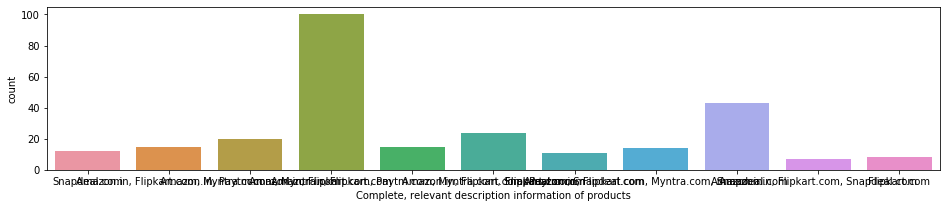

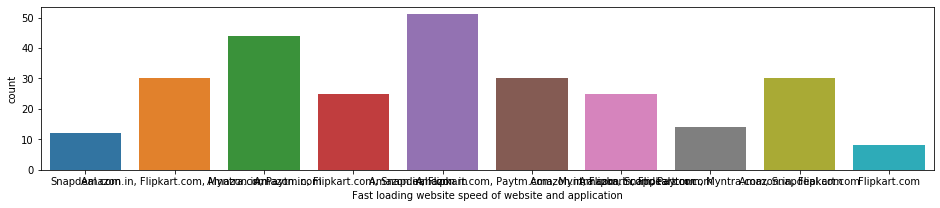

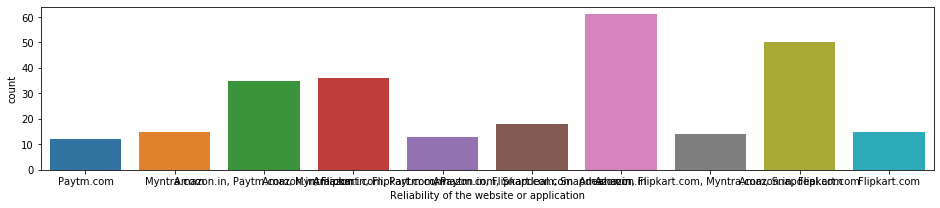

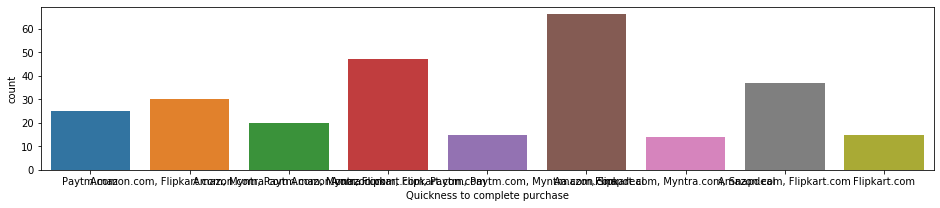

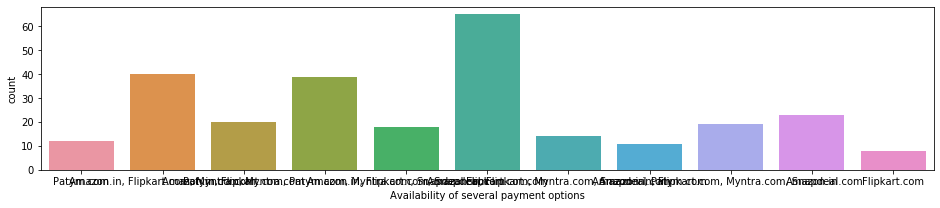

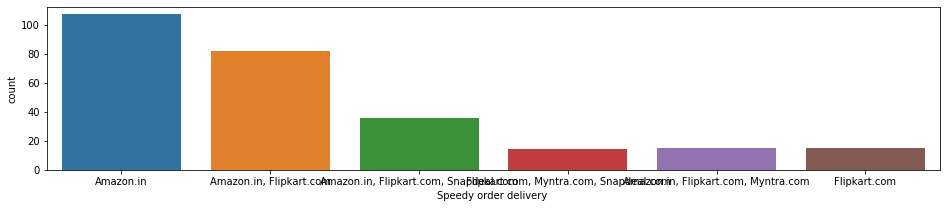

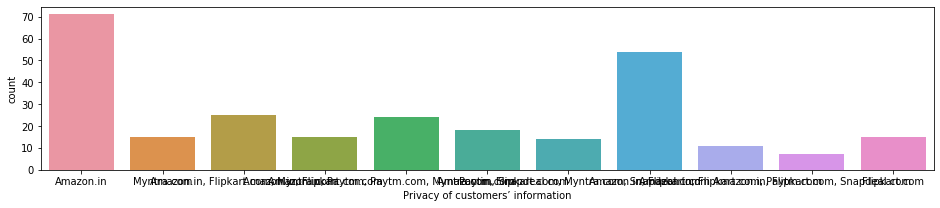

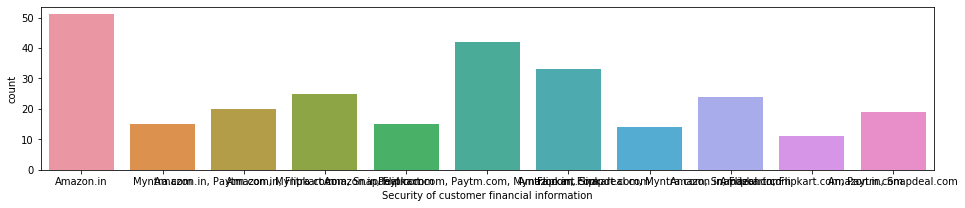

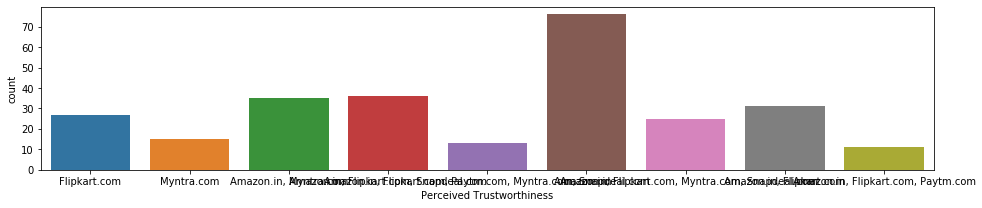

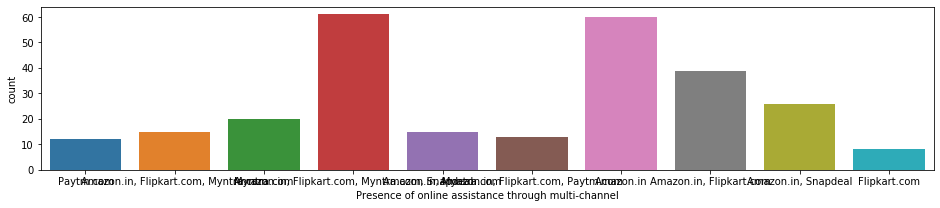

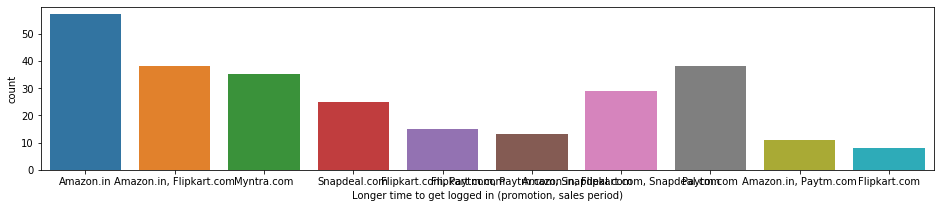

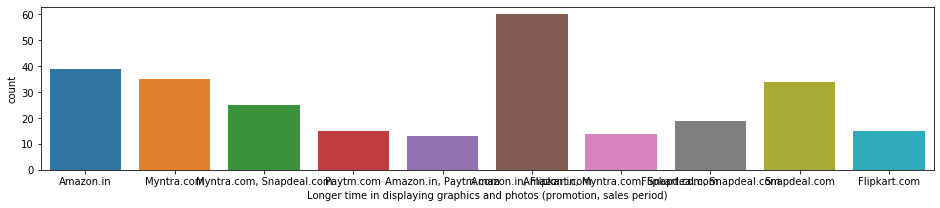

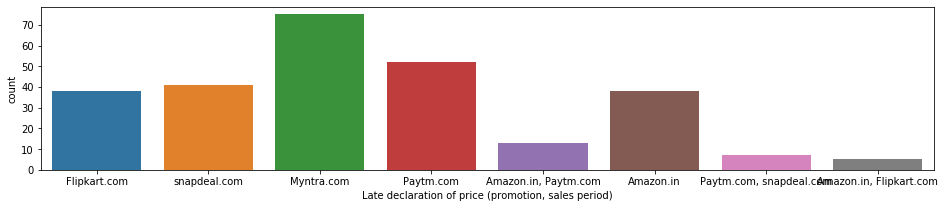

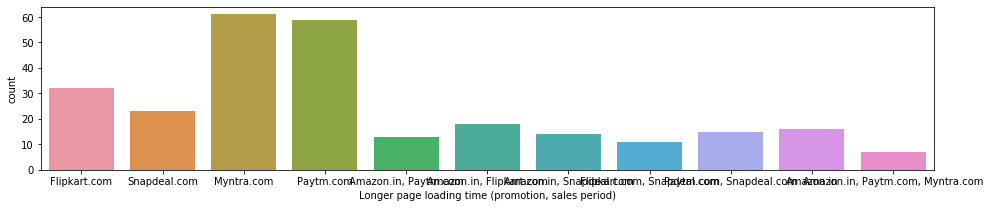

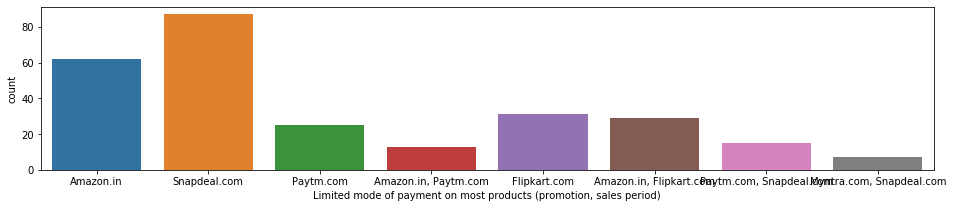

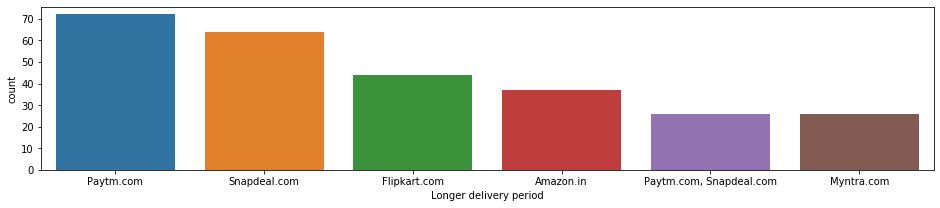

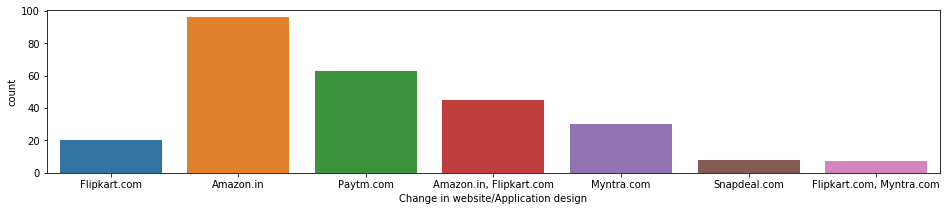

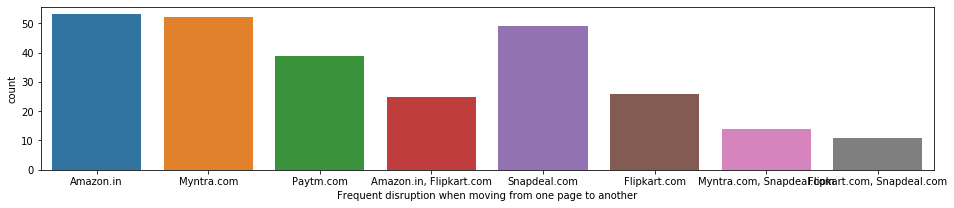

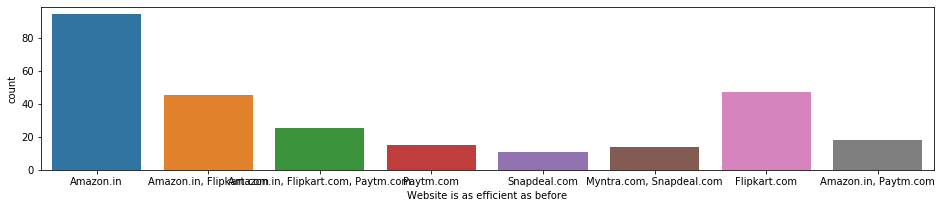

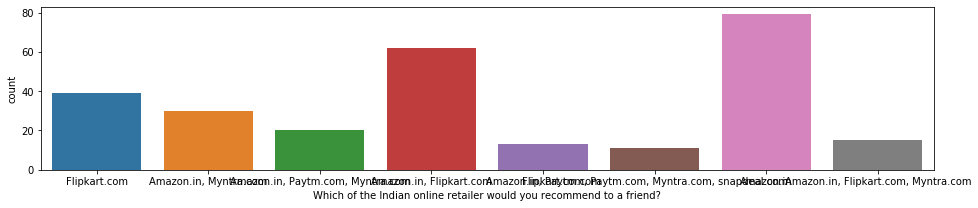

In [13]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

Observation:
    1. Female is more than male in Dataset.
    2. Age between 21 to 50 is more buy online product or sserching buying online product.
    3. Delhi on metropolition city for online shop is maximum but in Gurgaon online shop is less than Ghaziabad.
    4. More than 4 year for Shopping online is maximum in the dataset.
    5. Online puchase is less than 10 product is maximum means in the offer day and reqirement of the product than buy the product.
    6. 30 to 40 item purchase online in the dataset is also more means generally maximum person go for online product.
    7. Using moblile phone internet for shopping online prodcut is more and Dial Up is very less.
    8. Smart Phone and Laptip is maxium time using for online shopping.
    8. Windows operating system based mobile and laptop is used for online shop.
    9. Google Chrome broser is maximum time to access the website as compare to other broser.
    
    10. Serch engine is useful for retaion of the customer.
    11. After first visit E-mail and social media is not better for reach after first time reach online retail store via Application ,Direct url and serach engine.
    12. More than 15 min is for puchase decision.
    13. For Payment Option customer credit/debit card and case on delivey option preffered.
    14. If Customer make mindset for buying product so generlly payment the pdoduct very less chance for go witout payment.
    15. If Customer comparison the price of product in different online shop if better alternative offer for same product is find out in diiferent shop than maximum chance to leave witout payment.
    16. Content of the website or Product is easy to read and understand for userr for reataion of cutomer chance is increse.
    17. For similar product one highlighted is very importent for cutomer to buyig product using comaprison.
    18. Before the Purchase the product customer read the compete information about listed seller and product deatil.
        So comlete product deatil and seller informatiom is very useful factor in online shop.
    19. Navigation of the website is also good for online shop or retaion of the customer.
    20. Loading and processing spped is very less than customer leave the website and not chanse to again come for shop.
    21. User friendly website is also importent factor for reation of customer.
    22. Payemt option is aslo convienet.
    23. Privecy of the customer is gurantee by customer is also importent for retaion of the cutomer or online shop.
    24. If different communication channel is provided by Online shop than maximum chance to reation of the customer.
    25. Online shop provide benifit and discount in the product than customer again reach for buying the product from online shop.
    26. for purchase the decion of any product return and replacement policy is very importent for online shop if return and replacement policy is avalable than customer purchase the product.
  
    27. Quality information is provided for satisfaction for customer.  
    28. If user satisfy with the application or website of online shop than again come and reach buyiing the product.
    29. If user is not trust the online shop than user staisfaction is not importenet so firstly the trust factor builldup by online shop.
    30. Wide range of product category for user than maximum chanse to buying the product is satisfy and trust on yhe online shop.So category of the product is more so maximum cganse to user not leave. 
    
    
    
    
    
    
    
    
    
    
    

### Feature 1 to 47 generally gives the Idea for Growing Online Shop and Customer Behavaior for Online Shop and how to grow Businees.

## E-retail factors for customer activation and retention find out from features 1 to 47

## Baesd On Features 1 to 47 Online Shop and Business study from Indian e-commerce customers

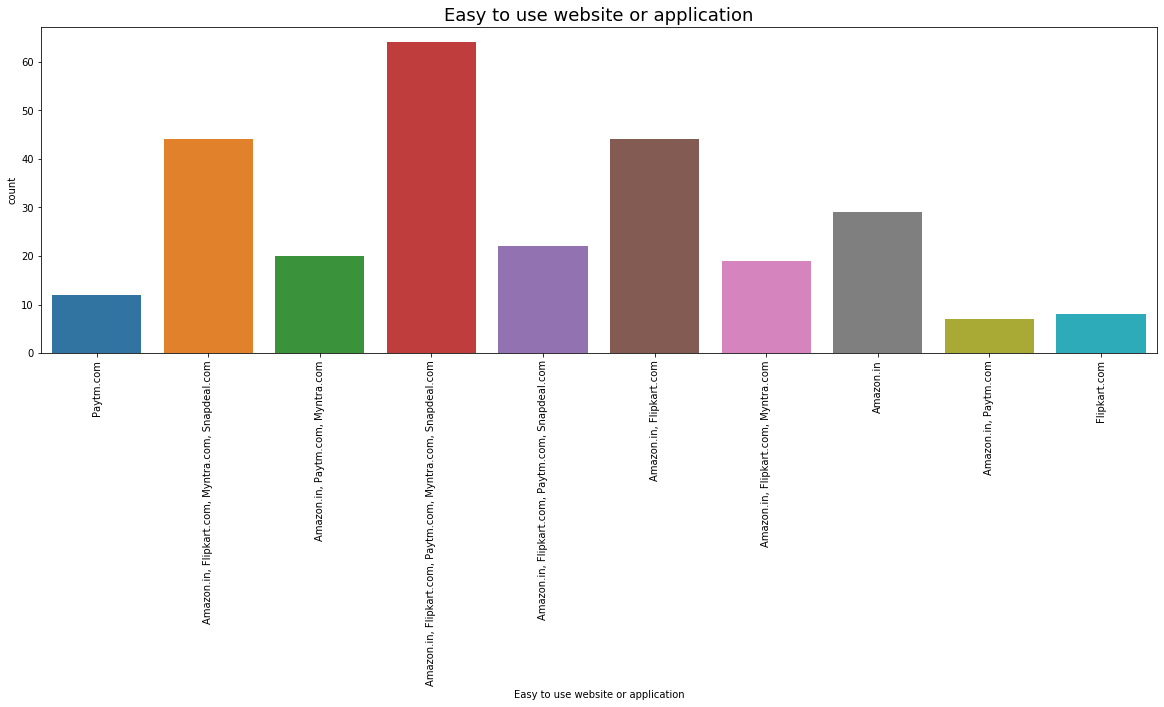

In [14]:
#Easy to use website or application
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Easy to use website or application', data=df)

plt.title('Easy to use website or application',fontsize=18)
plt.show()

Amazon and Flipkart is easy to use wensite and application.

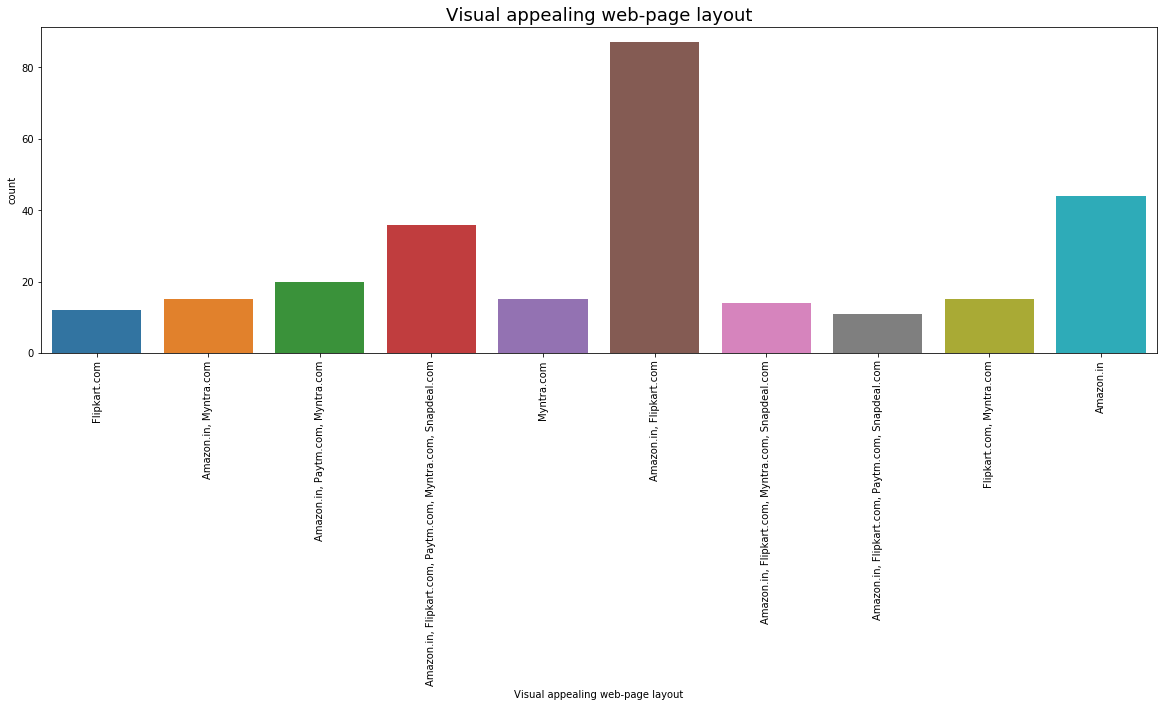

In [15]:
#Visual appealing web-page layout.
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Visual appealing web-page layout', data=df)

plt.title('Visual appealing web-page layout',fontsize=18)
plt.show()

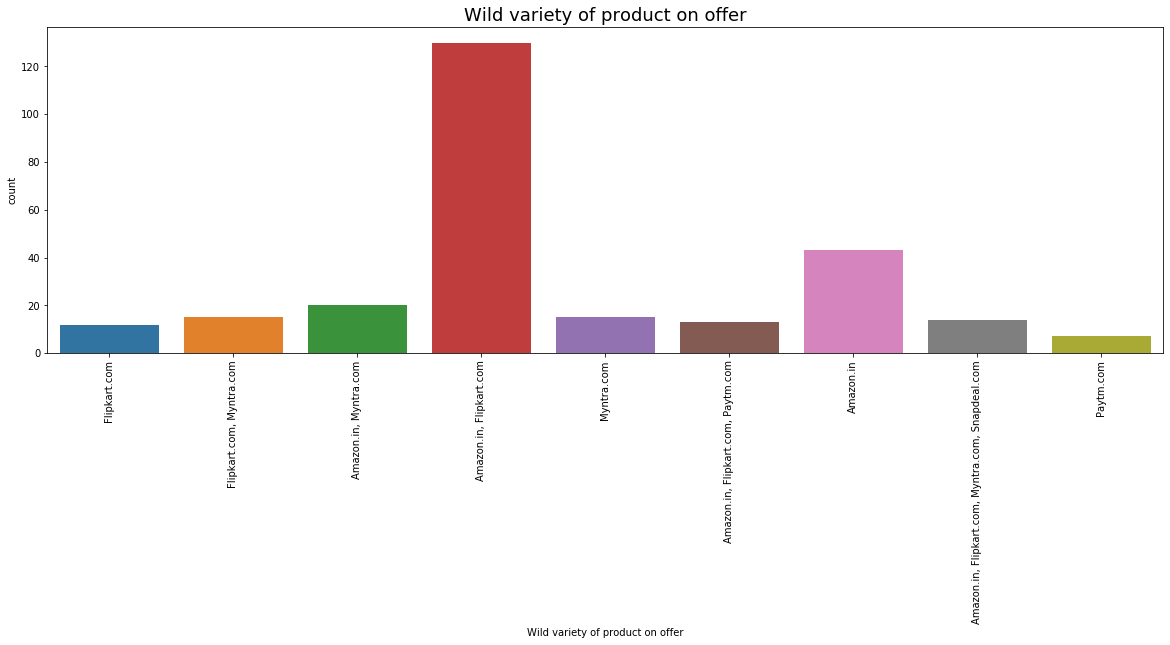

In [16]:
#Wild variety of product on offer.
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Wild variety of product on offer', data=df)

plt.title('Wild variety of product on offer',fontsize=18)
plt.show()

Amazon and Flipkart also provide wide varity on Product.

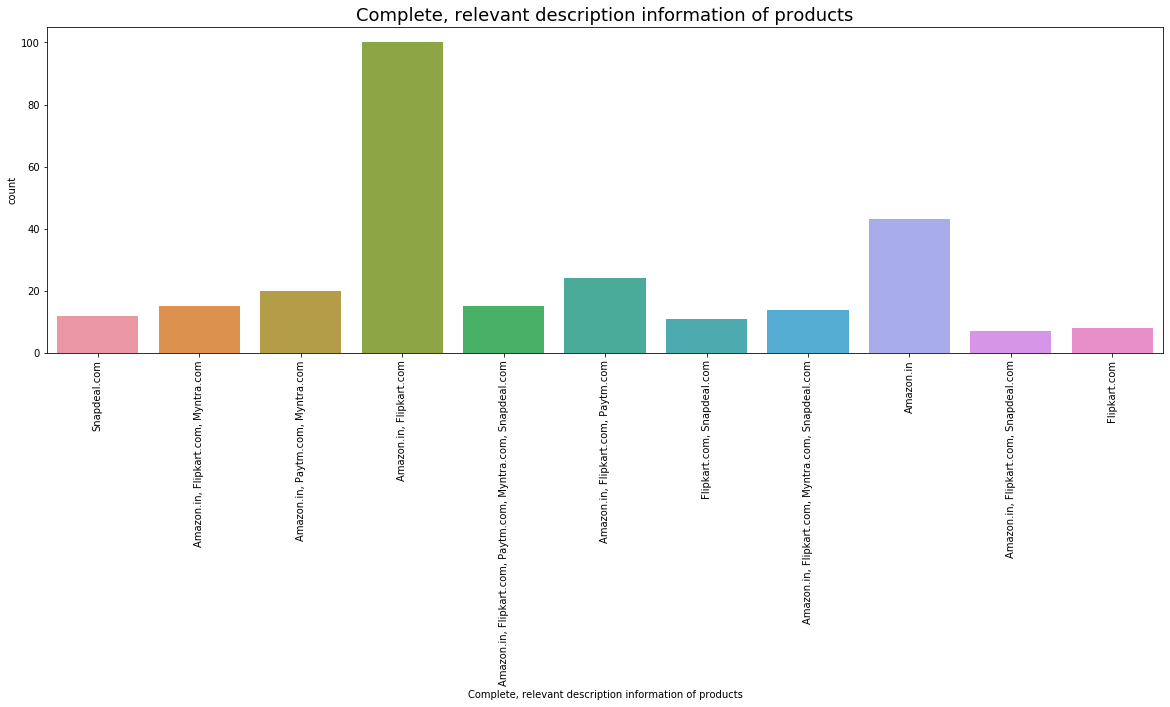

In [17]:
#Complete, relevant description information of products.
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Complete, relevant description information of products', data=df)

plt.title('Complete, relevant description information of products',fontsize=18)
plt.show()

Amazon and Flipkart also provide the complete Impormation about Product.

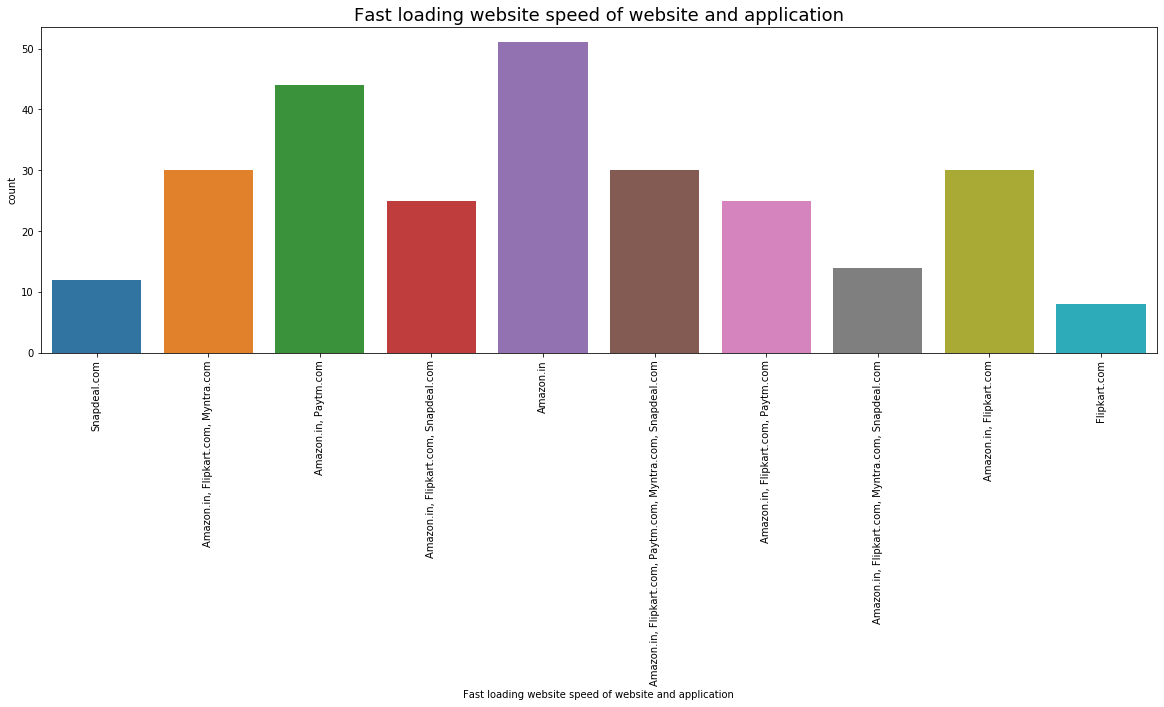

In [18]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Fast loading website speed of website and application', data=df)

plt.title('Fast loading website speed of website and application',fontsize=18)
plt.show()

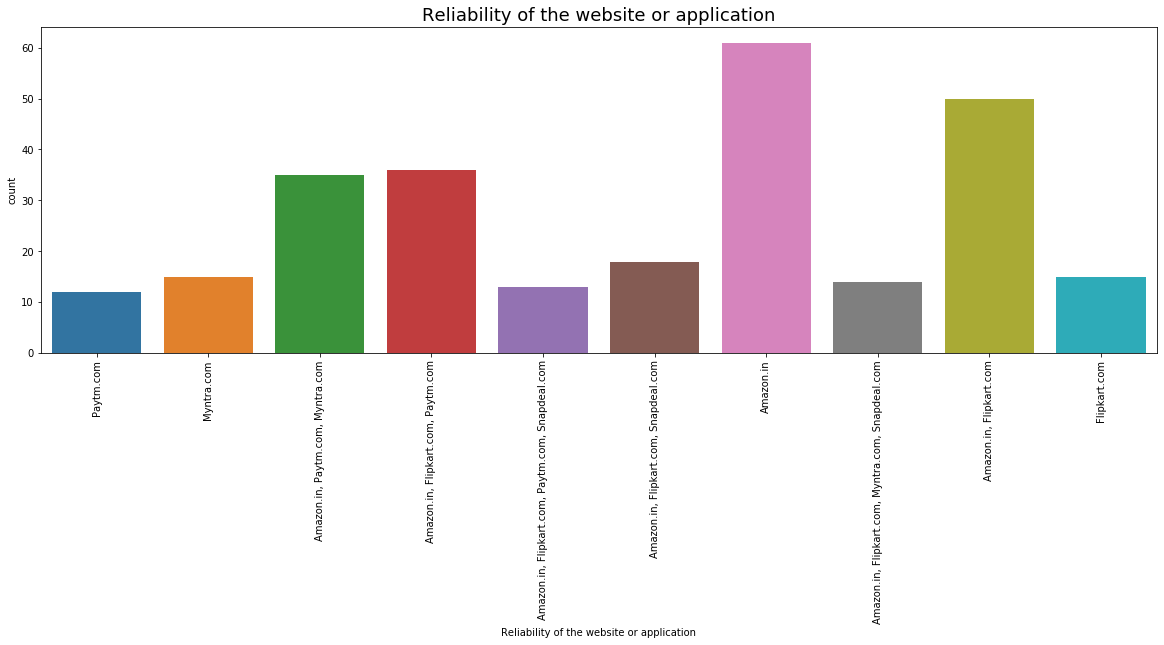

In [19]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Reliability of the website or application', data=df)

plt.title('Reliability of the website or application',fontsize=18)
plt.show()

Amazon is Most Reliabilty of the Application and Flipkart is also.

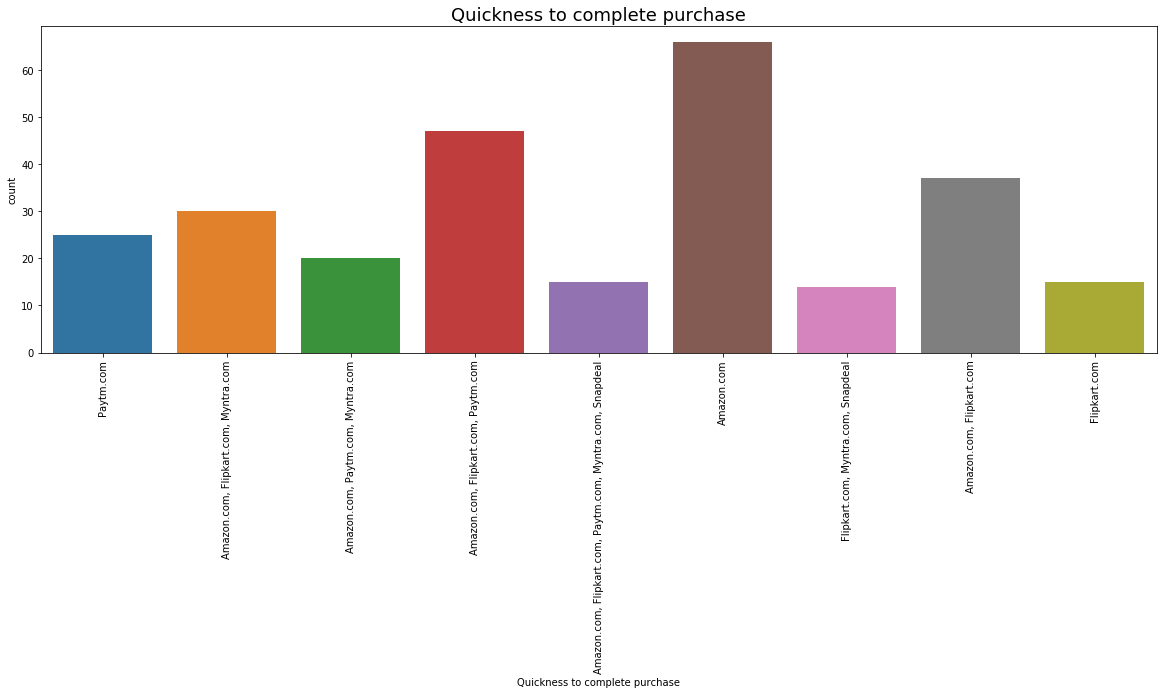

In [20]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Quickness to complete purchase', data=df)

plt.title('Quickness to complete purchase',fontsize=18)
plt.show()

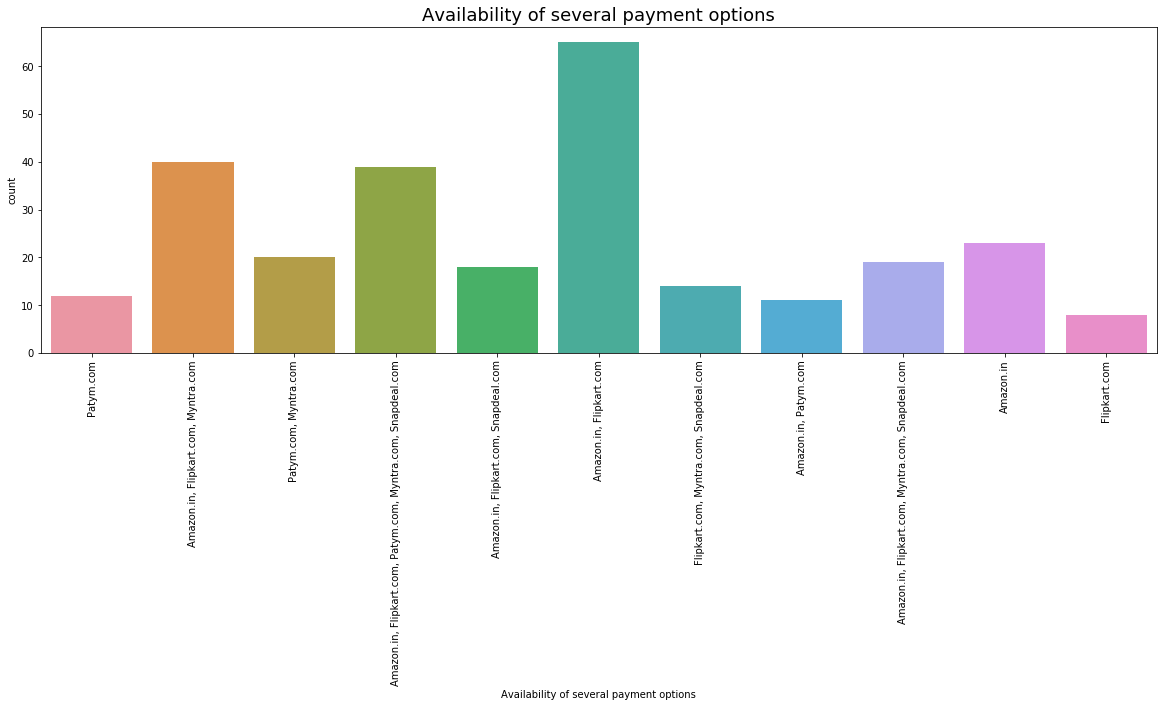

In [21]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Availability of several payment options', data=df)

plt.title('Availability of several payment options',fontsize=18)
plt.show()

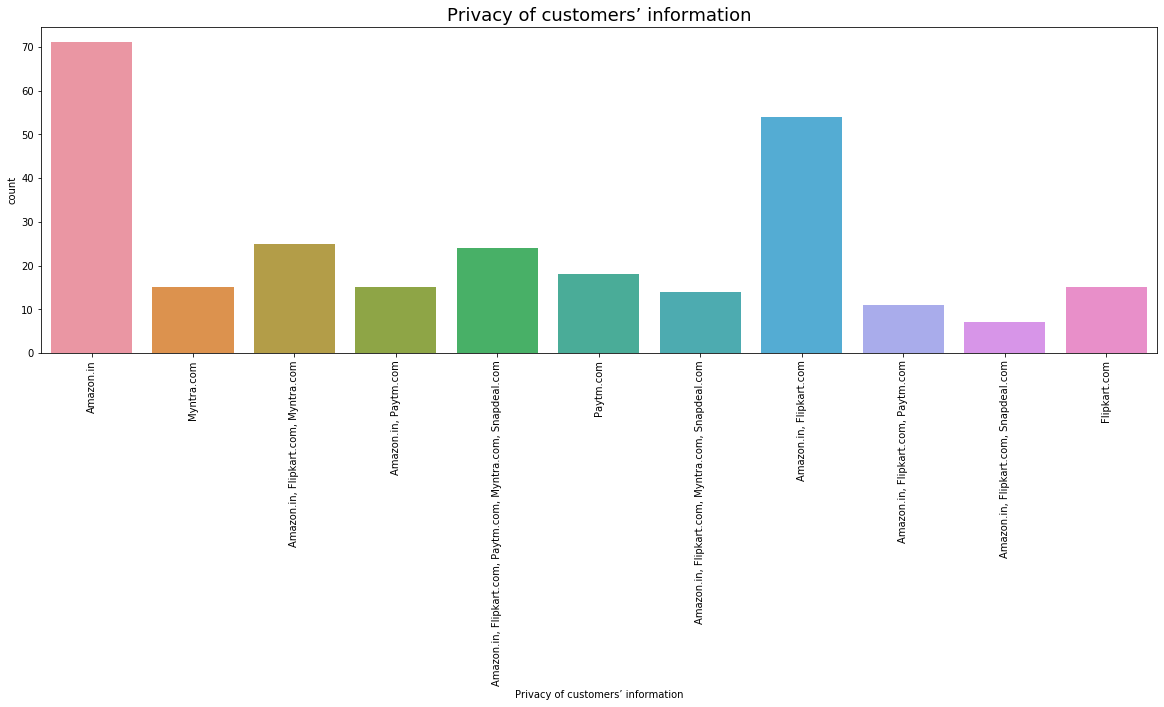

In [22]:
#Privacy of customers’ information.
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Privacy of customers’ information', data=df)

plt.title('Privacy of customers’ information',fontsize=18)
plt.show()

Amzon and Flipkart online shop is maitain  thePrivacy of the customer information 

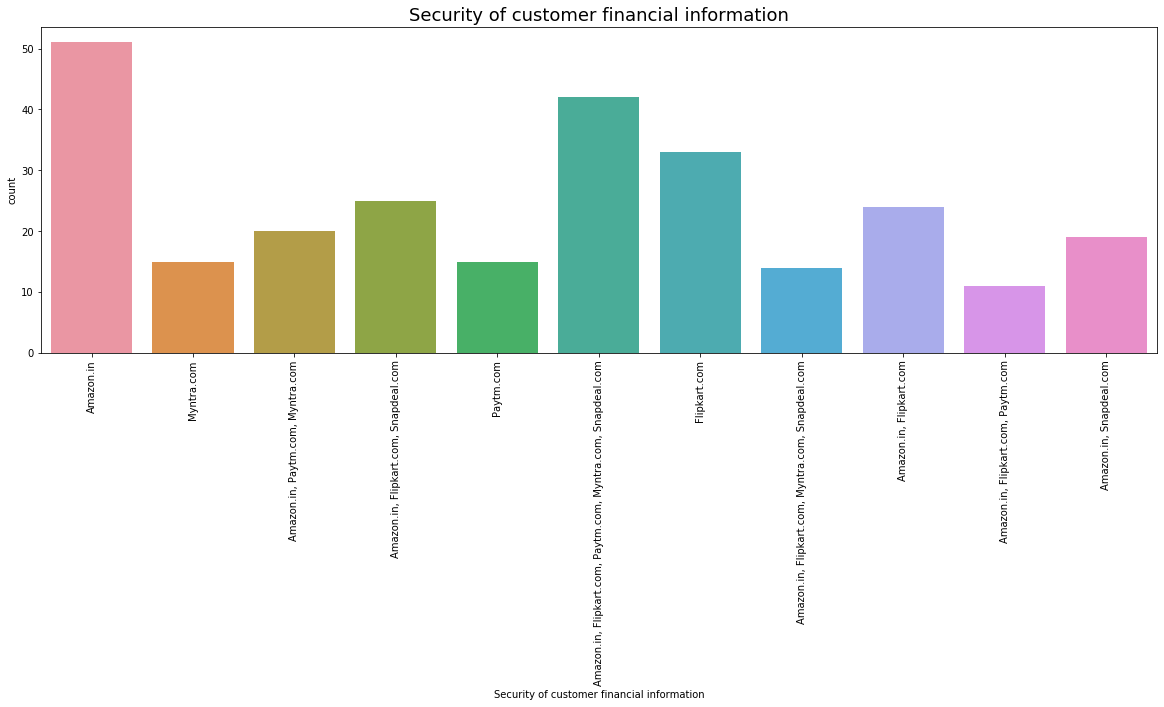

In [23]:
#Customer financial information.
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Security of customer financial information', data=df)

plt.title('Security of customer financial information',fontsize=18)
plt.show()

Customer Finacial Information is more seure in Amazon.

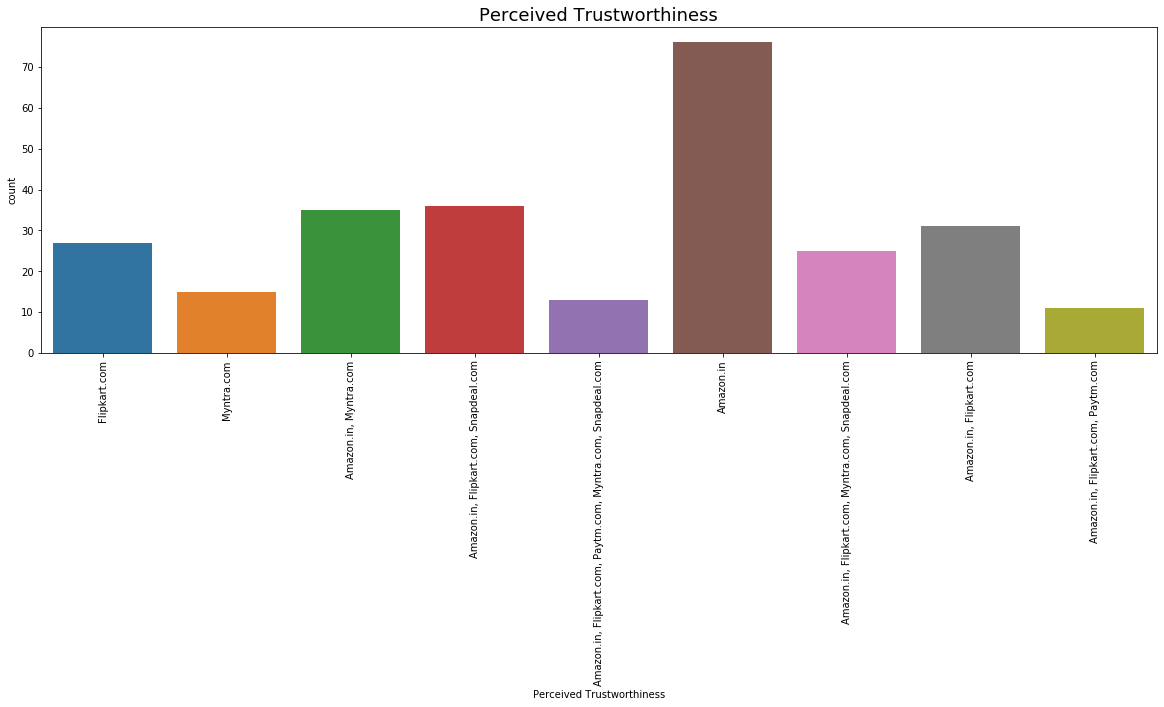

In [24]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Perceived Trustworthiness', data=df)

plt.title('Perceived Trustworthiness',fontsize=18)
plt.show()

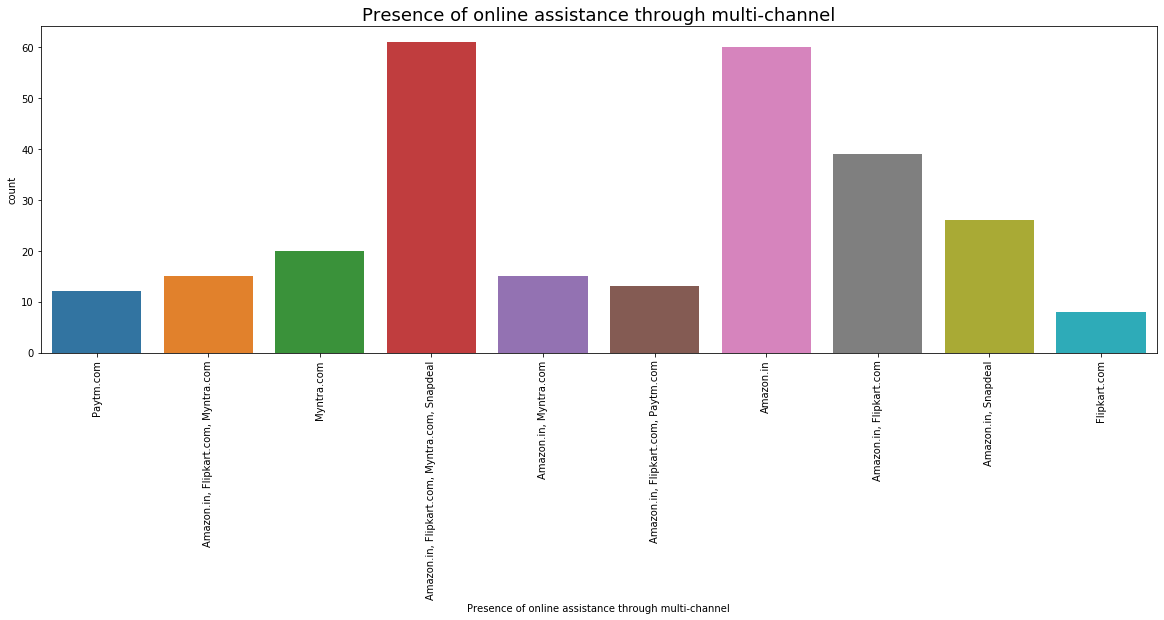

In [25]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Presence of online assistance through multi-channel', data=df)

plt.title('Presence of online assistance through multi-channel',fontsize=18)
plt.show()

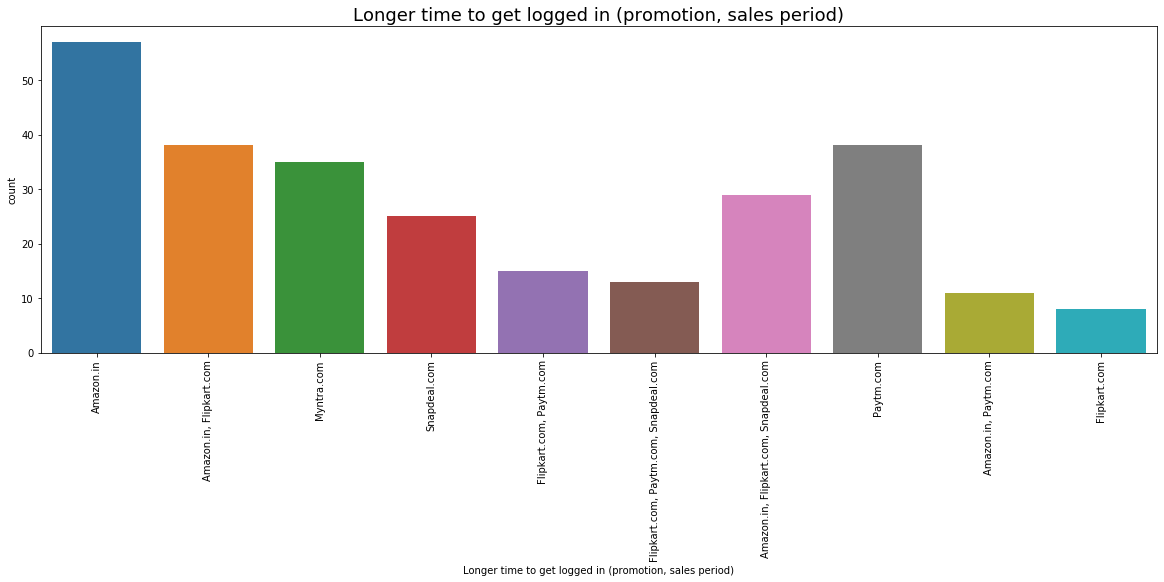

In [26]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer time to get logged in (promotion, sales period)', data=df)

plt.title('Longer time to get logged in (promotion, sales period)',fontsize=18)
plt.show()

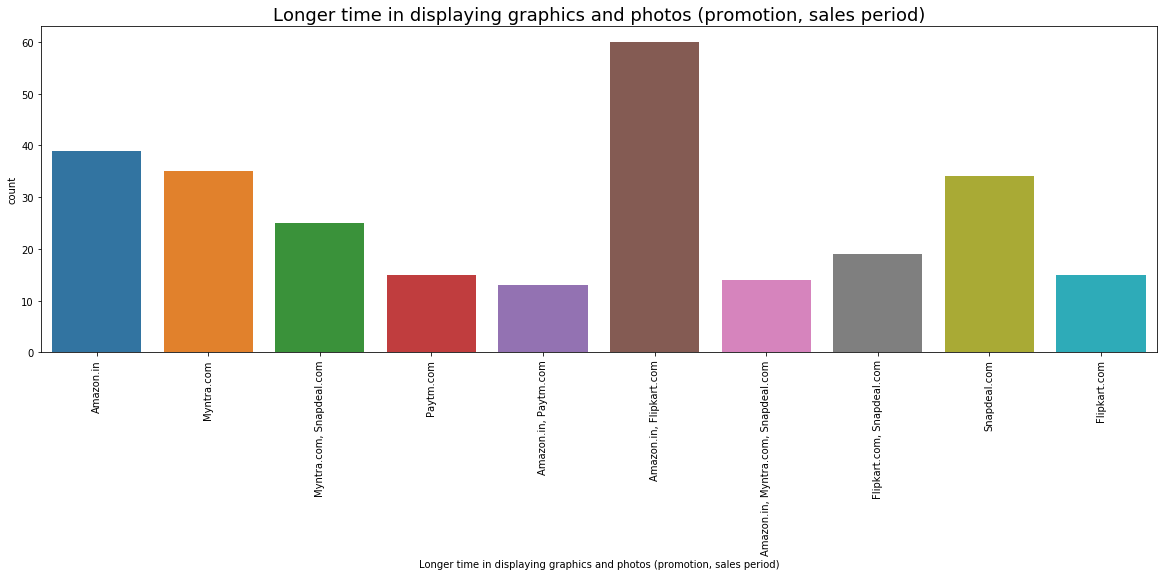

In [27]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer time in displaying graphics and photos (promotion, sales period)', data=df)

plt.title('Longer time in displaying graphics and photos (promotion, sales period)',fontsize=18)
plt.show()

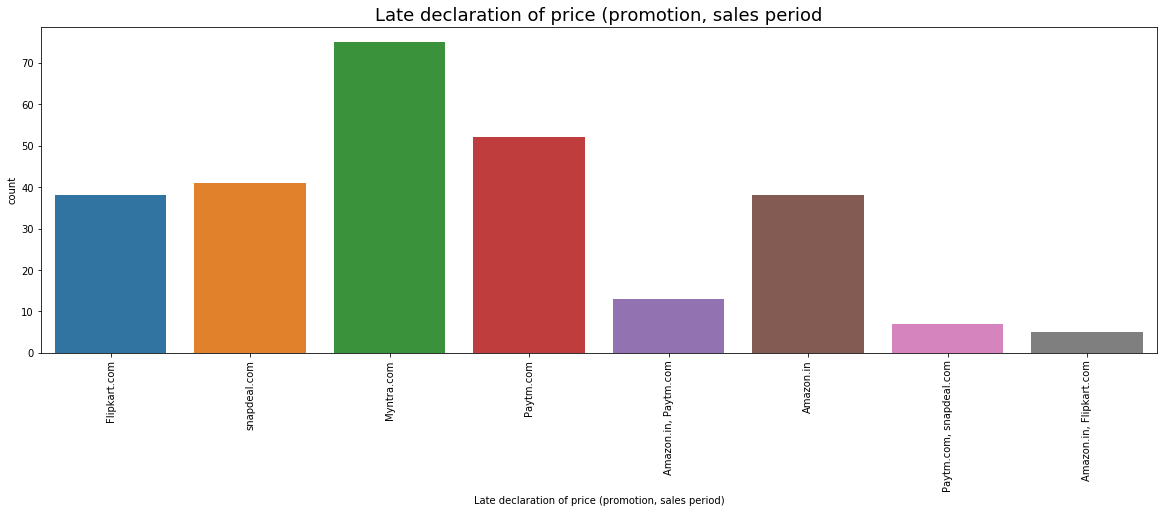

In [28]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Late declaration of price (promotion, sales period)', data=df)

plt.title('Late declaration of price (promotion, sales period',fontsize=18)
plt.show()

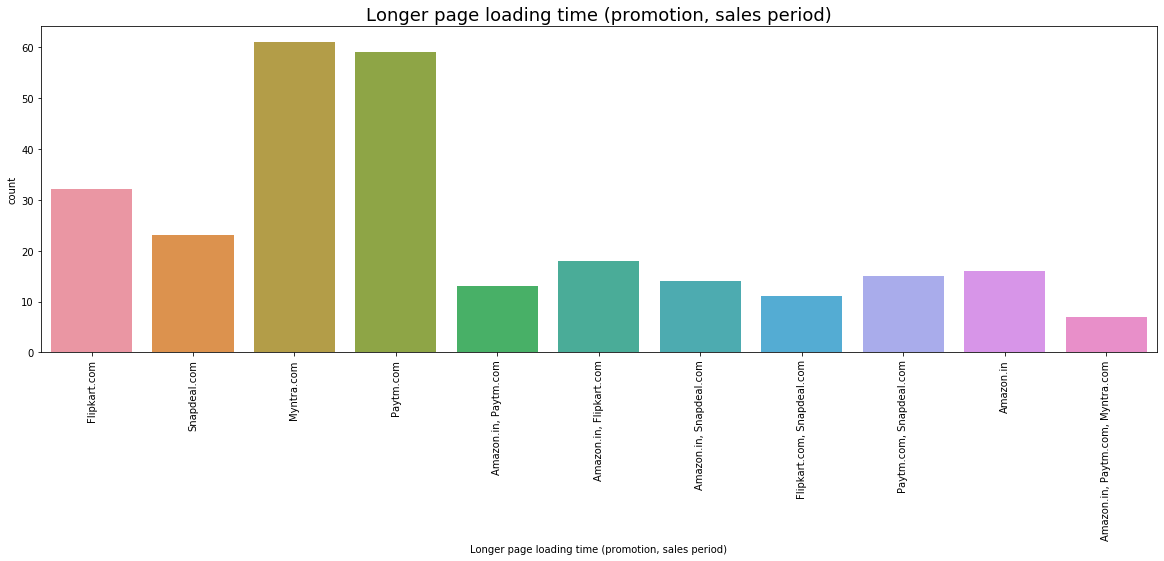

In [29]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer page loading time (promotion, sales period)', data=df)

plt.title('Longer page loading time (promotion, sales period)',fontsize=18)
plt.show()

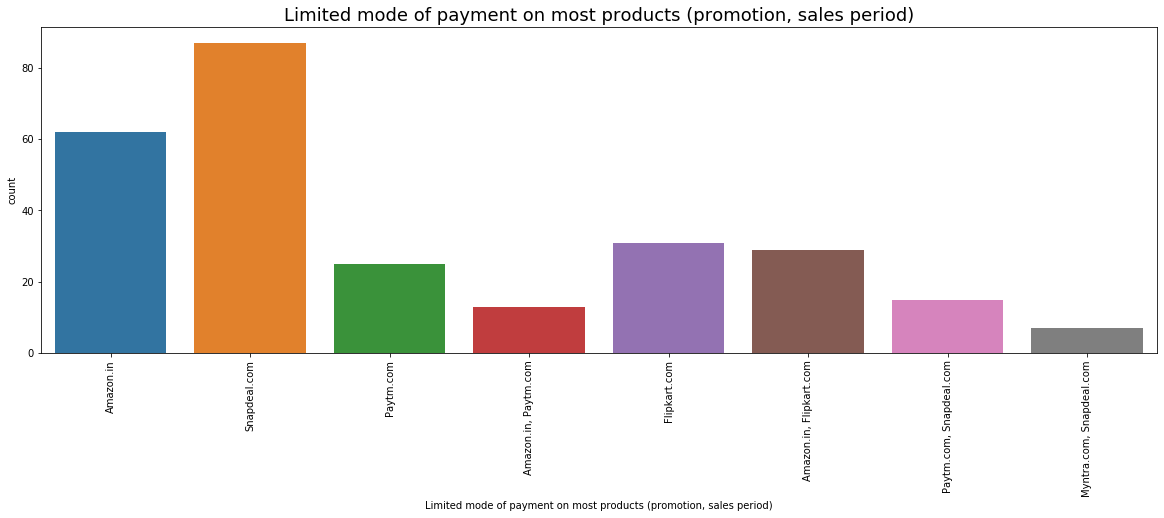

In [30]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Limited mode of payment on most products (promotion, sales period)', data=df)

plt.title('Limited mode of payment on most products (promotion, sales period)',fontsize=18)
plt.show()

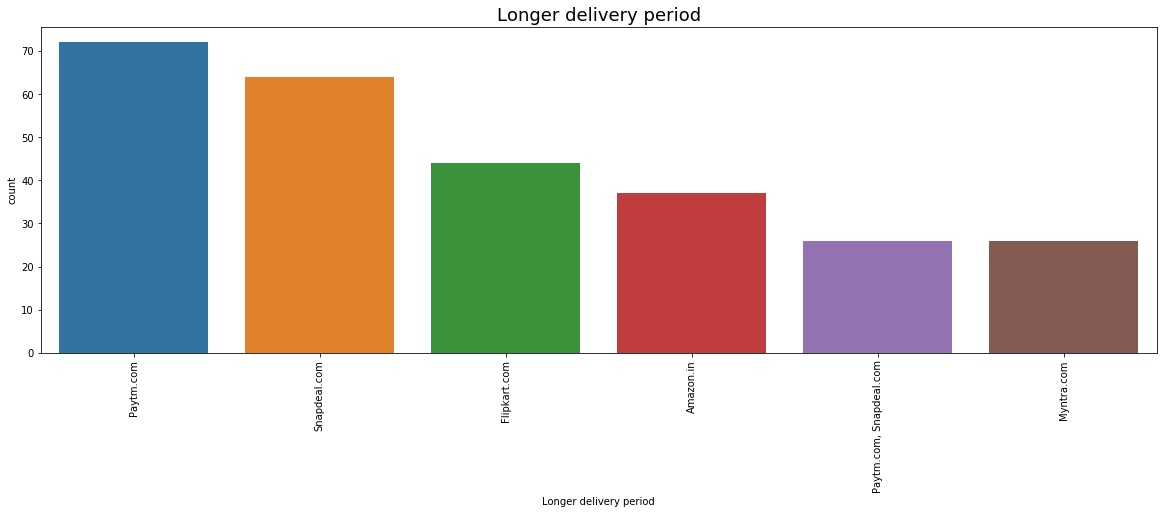

In [31]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer delivery period', data=df)

plt.title('Longer delivery period',fontsize=18)
plt.show()

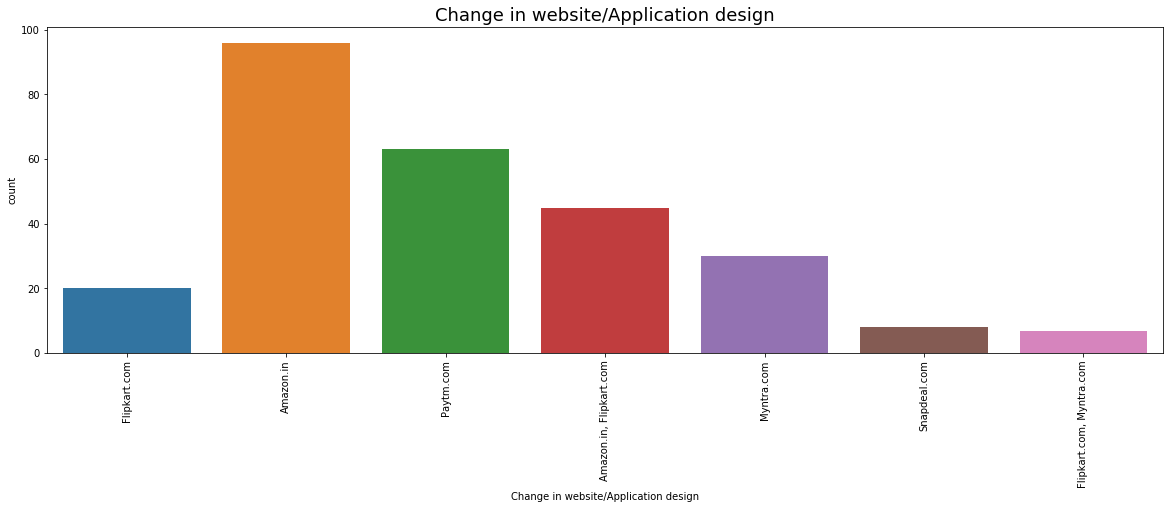

In [32]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Change in website/Application design', data=df)

plt.title('Change in website/Application design',fontsize=18)
plt.show()

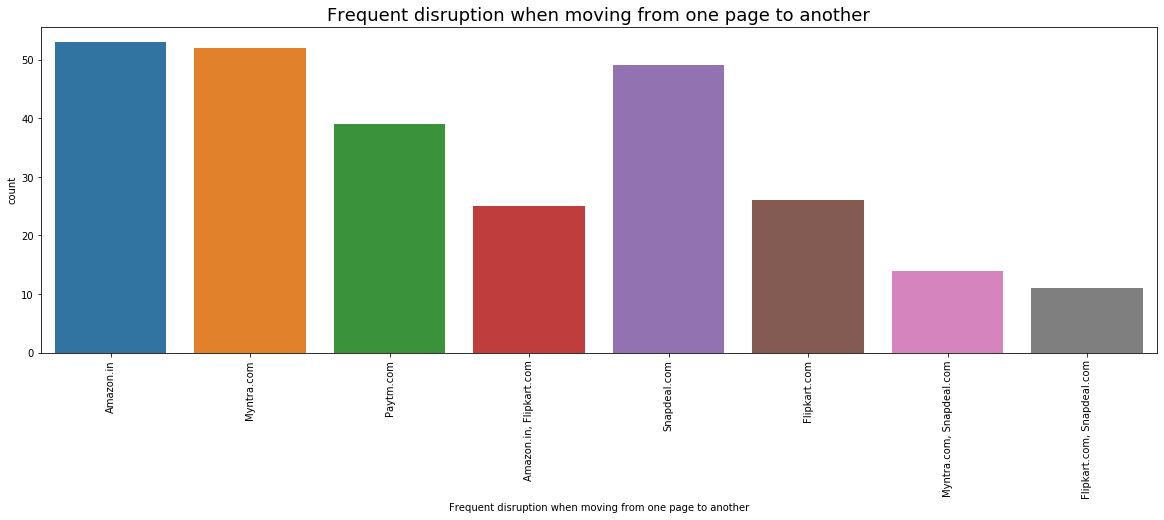

In [35]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Frequent disruption when moving from one page to another', data=df)

plt.title('Frequent disruption when moving from one page to another',fontsize=18)
plt.show()

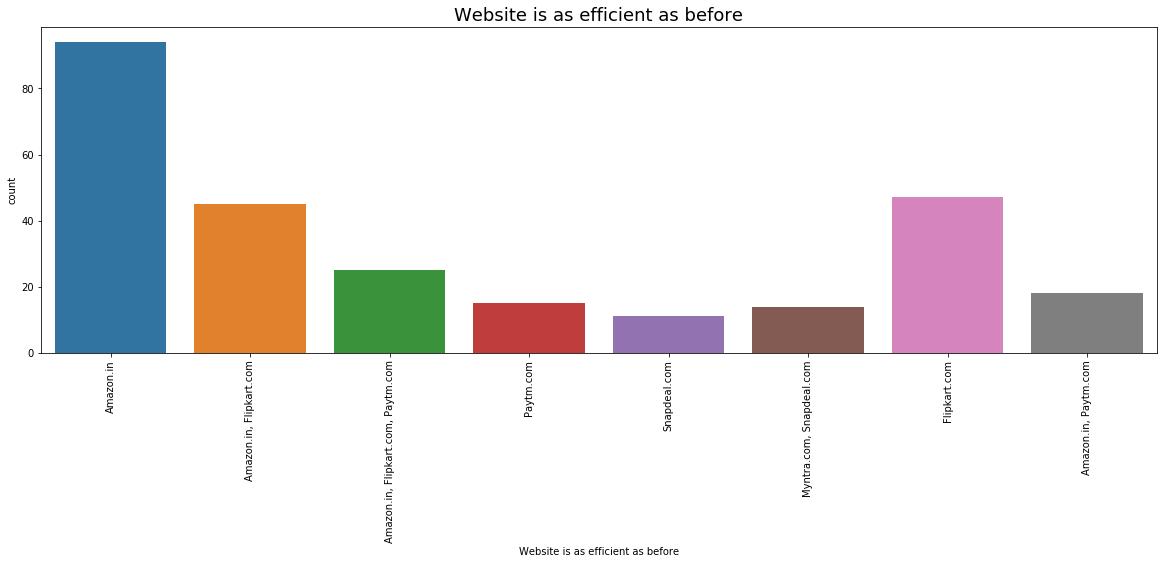

In [34]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Website is as efficient as before', data=df)

plt.title('Website is as efficient as before',fontsize=18)
plt.show()

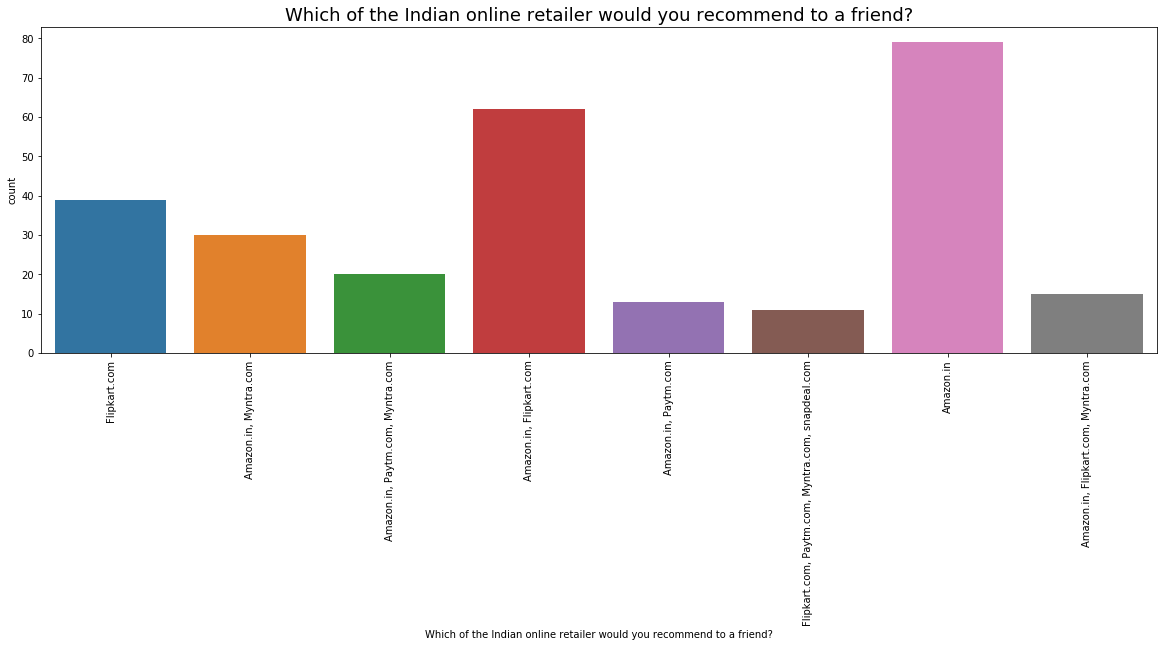

In [33]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?', data=df)

plt.title('Which of the Indian online retailer would you recommend to a friend?',fontsize=18)
plt.show()

Recommend for friend Amazon is mostly Application and after that Flipkart is most recomnded by Friend.

### Baesd on E-retail factors for customer activation and retention Amazon is most reliable and fullfill the requirement of Customer after Amazon Flipkart is more use for Buying or fullfill the factor of ONline Shop.

### A case study from Indian e-commerce customers Amazon and Flipkart is mostly used and for Online Shop and Recomnded by Friend.